<h1> <i>Session 2: Linear Regression Extended.</i> </h1>

<p>The following notebook provides an example code of analyzing <b>house prices</b> using linear regression.The dependent variable which we will be used in OLS model is Price. The aim of the session is reveal best model using different selection methods and data transformations.
    
The general sequence of steps that we will follow is the following:
<br>The general sequence of steps for the analysis the following:
1. [Descriptive analysis](#pandas)
2. [Data transformation for visual insights](#transf)
3.  [Model selection](#select)

    3.1  [Running and building the OLS model (statsmodels) (backward selection, model transformation)](#stats)
    
    3.2  [Running and building the OLS model (sklearn) ](#sklearn)
4. [Checking LR assumptions using residual analysis and statistical tests](#resid)   

Let's first explore the data on our features.

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Type: Type of house
      - h - house; 
      - u - unit, duplex; 
      - t - townhouse;

Price: Price in dollars

Method: 
Status of property sale 
      -  S - property sold
      - SP - property sold prior; 
      - PI - property passed in; 
      - VB - vendor bid; 

      
SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Postcode:Postal code

Bedroom2: Number of Bedrooms

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Area of Building

YearBuilt: Year the house was built

CouncilArea: City Council Area Name

Lattitude, Longitude: Building's geographical ooordinates

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.


<i> <u>Before starting any analysis, first import all the needed libraries.</u></i>

In [1]:
import pandas as pd #pandas for data manipulation, transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
from scipy import stats #for t-test
import statsmodels.api as sm #statsmodels library
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.model_selection import train_test_split #for train and test split
from sklearn.linear_model import LinearRegression #for LR using train test split
from sklearn.metrics import classification_report

 <h2>1.Descriptive analysis</h2> <a name="pandas"></a>

In [2]:
#importing the data and making a dataframe
data=pd.read_excel("housing_data.xlsx")

In [3]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 21 columns):
Suburb           110 non-null object
Address          110 non-null object
Rooms            110 non-null int64
Type             110 non-null object
Price            110 non-null int64
Method           110 non-null object
SellerG          110 non-null object
Date             110 non-null object
Distance         110 non-null float64
Postcode         110 non-null int64
Bedroom2         110 non-null int64
Bathroom         110 non-null int64
Car              110 non-null int64
Landsize         110 non-null int64
BuildingArea     110 non-null float64
YearBuilt        110 non-null int64
CouncilArea      110 non-null object
Lattitude        110 non-null float64
Longtitude       110 non-null float64
Regionname       110 non-null object
Propertycount    110 non-null int64
dtypes: float64(4), int64(9), object(8)
memory usage: 18.1+ KB


We have 21 variables of 110 observations.

In [4]:
#have a look at first rows of the dataframe
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,3/8 Walter St,2,t,865000,SP,Nelson,18/03/2017,5.9,3032,...,2,1,146,132.0,2015,Moonee Valley City Council,-37.7713,144.9038,Western Metropolitan,6567
1,Ascot Vale,12/9 Milton St,2,u,442000,S,Alexkarbon,18/06/2016,5.9,3032,...,1,1,0,62.0,1975,Moonee Valley City Council,-37.7733,144.9219,Western Metropolitan,6567
2,Ascot Vale,21A Geddes St,3,h,1037500,S,Alexkarbon,19/11/2016,5.9,3032,...,1,2,506,110.0,1920,Moonee Valley City Council,-37.7779,144.9133,Western Metropolitan,6567
3,Ascot Vale,1/20 Newsom St,3,t,1050000,S,Jellis,19/11/2016,5.9,3032,...,2,2,318,160.0,2013,Moonee Valley City Council,-37.7744,144.9035,Western Metropolitan,6567
4,Ascot Vale,4/27 Roseberry St,2,u,440000,S,McDonald,19/11/2016,5.9,3032,...,1,1,0,65.0,1970,Moonee Valley City Council,-37.7749,144.9137,Western Metropolitan,6567


In [5]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,3.081818,1.011146e+06,10.210000,3083.490909,3.081818,1.672727,1.609091,488.327273,149.456818,1964.009091,-37.805117,144.963558,7644.827273
std,0.968606,5.049120e+05,6.508653,90.533561,1.023860,0.791110,0.919667,434.624738,79.724047,39.751636,0.076131,0.127405,4100.849961
min,1.000000,2.750000e+05,2.400000,3011.000000,1.000000,1.000000,0.000000,0.000000,35.000000,1890.000000,-38.099950,144.609770,962.000000
25%,3.000000,6.888750e+05,5.200000,3032.000000,2.250000,1.000000,1.000000,208.500000,101.750000,1930.000000,-37.861365,144.908150,5164.500000
50%,3.000000,9.435000e+05,6.400000,3056.000000,3.000000,2.000000,2.000000,450.500000,139.000000,1970.000000,-37.778100,144.958350,6567.000000
75%,4.000000,1.272000e+06,14.000000,3132.500000,4.000000,2.000000,2.000000,639.500000,175.750000,2004.000000,-37.772800,145.023403,10579.000000
max,8.000000,2.950000e+06,35.400000,3752.000000,9.000000,7.000000,4.000000,2905.000000,618.000000,2017.000000,-37.576810,145.299590,21650.000000


In [6]:
#checking for NAs
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [7]:
#checking whether there are columns having same value for all observations
data.columns[data.nunique()==1]

Index([], dtype='object')

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


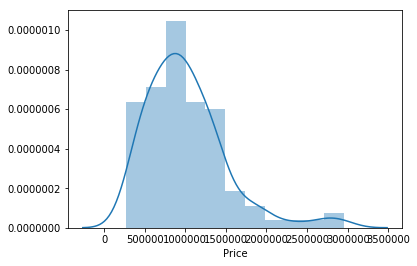

In [8]:
#let's visualise the distribution of price
sns.distplot(data.Price)
plt.show()

As it can be seen, we have a right-skewed data  of a large scale.

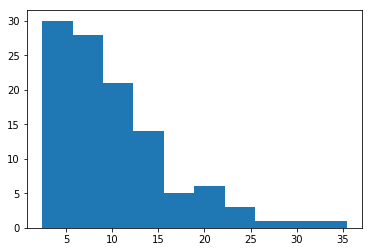

In [9]:
#let's visualise one of explanatory variables
plt.hist(data.Distance)
plt.show()

In [10]:
#let's see categories and number of observations in each category for object variables
for i in data.select_dtypes(include="object").columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

Suburb 
 Ascot Vale          25
Brunswick           16
Ashburton            8
Brunswick East       5
Point Cook           3
Reservoir            2
Richmond             2
Roxburgh Park        2
Sunshine West        2
Altona               2
Oakleigh South       2
Broadmeadows         2
Taylors Hill         2
Wheelers Hill        2
Brighton             2
Toorak               2
Boronia              2
Werribee             2
Yarraville           2
Vermont              1
Ringwood North       1
Blackburn            1
Avondale Heights     1
South Morang         1
Aspendale            1
Thomastown           1
Blackburn North      1
Wyndham Vale         1
Seddon               1
Sunbury              1
Altona North         1
Ashwood              1
Parkdale             1
Nunawading           1
Preston              1
Seabrook             1
Balwyn               1
Brighton East        1
Bayswater North      1
Brooklyn             1
Brunswick West       1
West Footscray       1
Seaford              1
Su

<h1>2.Data transformation for visual insights </h1> <a name="transf"> </a>

We can see that Suburbs, Address,SellerG, Date, CouncilArea have unique values for almost every observation. As most of them cannot be grouped into category with less levels, we will not use them in further analysis and prediction.
However, we can try to get some insights with date variable, categorize it by season and use it for descriptive analysis.

In [11]:
#let's drop the  following variables:"Suburb","Address","SellerG","CouncilArea",'Postcode',"Lattitude", "Longitude" 
#as some of them don't provide any meaningful information, and some have too many categories
data.drop(["Suburb","Address","SellerG","CouncilArea","Postcode", "Lattitude", "Longtitude"],axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
Rooms            110 non-null int64
Type             110 non-null object
Price            110 non-null int64
Method           110 non-null object
Date             110 non-null object
Distance         110 non-null float64
Bedroom2         110 non-null int64
Bathroom         110 non-null int64
Car              110 non-null int64
Landsize         110 non-null int64
BuildingArea     110 non-null float64
YearBuilt        110 non-null int64
Regionname       110 non-null object
Propertycount    110 non-null int64
dtypes: float64(2), int64(8), object(4)
memory usage: 12.1+ KB


 <h3>2.1.Descriptive analysis using visualization</h3>

<i><b>Let's outline some questions that might be insightful from price analytics point.</i></b>

      -Is there a seasonality trend for Price? 
      -Does the Price change drastically based on year/century built?
      -Does the Price differ based on Region?

In [13]:
#First let's transform the "Date" column into datetime format

In [14]:
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True)

In [15]:
#separating the month
data["Month"]=data["Date"].apply(lambda x:x.month)

In [16]:
#transforming the date into season
data["Season"]=data.Month.apply(lambda x: (x%12 + 3)//3)

In [17]:
#Creating new variable from the existing one
data['YearSold']=data["Date"].apply(lambda x:x.year)

In [18]:
#renaming the values 1-4 into Seasons and adding a column
data["Season"]=data.Season.map({1:'Winter',2:'Spring',3:'Summer',4:'Autumn'})

In [19]:
data["Season"].value_counts()

Summer    68
Spring    19
Winter    15
Autumn     8
Name: Season, dtype: int64

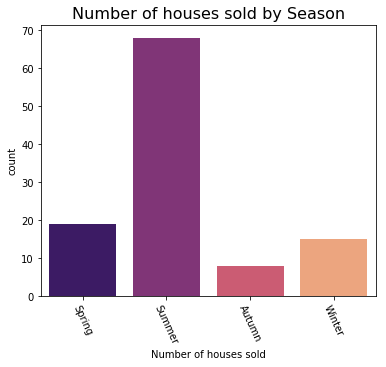

In [20]:
#let's see the Number of houses sold by season
plt.figure(num=None, figsize=(6,5))
cp=sns.countplot(x="Season",data=data, palette='magma',orient="h")
cp.set_xticklabels(cp.get_xticklabels(),rotation=-65)
plt.xlabel("Number of houses sold")
plt.title("Number of houses sold by Season",fontdict={"fontsize":16})
plt.show()

In [21]:
#Let's also see mean price by season
season_df=data.groupby(by='Season').mean()

In [22]:
season_df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Month,YearSold
Season,,,,,,,,,,,,
Autumn,3.625000,1.260062e+06,7.175000,3.750000,2.250000,1.875000,450.750000,186.625000,1958.125000,5688.250000,10.250000,2016.000000
Spring,2.736842,1.210158e+06,6.747368,2.684211,1.736842,1.368421,312.263158,161.497368,1958.947368,7654.684211,4.315789,2016.631579
Summer,3.029412,9.310456e+05,11.325000,3.029412,1.573529,1.661765,531.911765,142.217647,1964.955882,7841.073529,7.058824,2016.838235
Winter,3.466667,9.894333e+05,11.160000,3.466667,1.733333,1.533333,533.800000,147.200000,1969.266667,7786.200000,10.000000,2017.000000


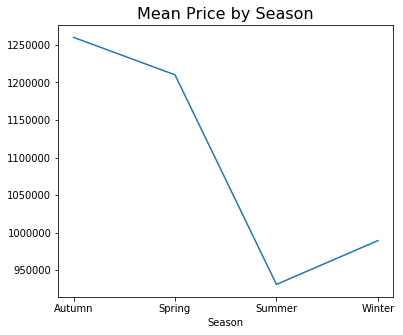

In [23]:
#let's see the mean price by season
plt.figure(num=None, figsize=(6,5))
plt.plot(season_df.Price)
plt.xlabel("Season")
plt.title("Mean Price by Season",fontdict={"fontsize":16})
plt.show()

We can see that mean price is lower during summer season, which hints why most of the houses are sold in summer.

In [25]:
#transforming only Built Year into datetime 
data['YearBuilt']=pd.to_datetime(data['YearBuilt'],format='%Y').apply(lambda x:x.year)

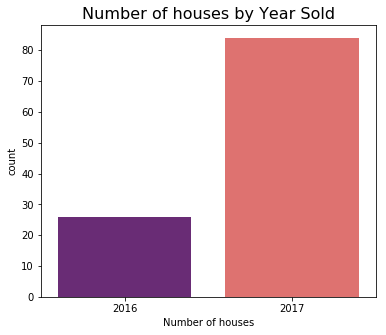

In [27]:
#When were most of the houses sold?
plt.figure(num=None, figsize=(6,5))
sns.countplot(x="YearSold",data=data, palette='magma')
plt.xlabel("Number of houses")
plt.title("Number of houses by Year Sold",fontdict={"fontsize":16})
plt.show()

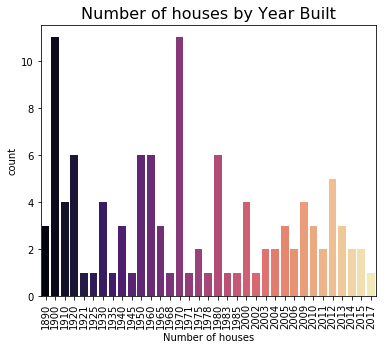

In [28]:
#When were most of the houses built?
plt.figure(num=None, figsize=(6,5))
cp=sns.countplot(x="YearBuilt",data=data, palette='magma')
cp.set_xticklabels(cp.get_xticklabels(),rotation=90)
plt.xlabel("Number of houses")
plt.title("Number of houses by Year Built",fontdict={"fontsize":16})
plt.show()

Interestingly, most of the houses sold in 2016-2017 were not a recently built ones, but rather old.

In [29]:
#How many years "old" are the houses sold?
data["year_diff"]=data["YearSold"]-data["YearBuilt"]
print(data["year_diff"].describe())

count    110.000000
mean      52.754545
std       39.700065
min        0.000000
25%       12.250000
50%       47.000000
75%       87.000000
max      127.000000
Name: year_diff, dtype: float64


Note that 50% of the houses sold are 47 years old and the maximum age is 127.

In [30]:
#Let's see mean price of the houses by year built
yearly_df=data.groupby(by='YearBuilt').mean()

Text(0.5, 1.0, 'Mean price by Year Built')

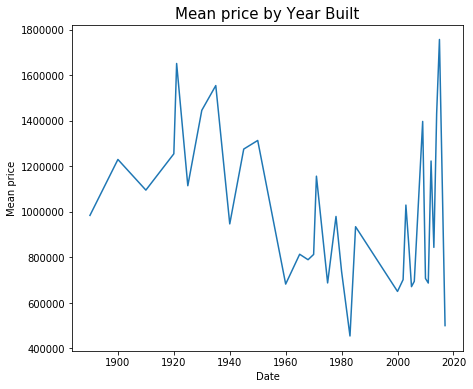

In [31]:
plt.figure(num=None, figsize=(7,6))
plt.plot(yearly_df.Price)
plt.xlabel("Date")
plt.ylabel("Mean price")
plt.title('Mean price by Year Built', fontsize=15)

Apparently mean price has its highest peak at 2017. Fluctuations in price for other years might be dependent on Region and other factors as well.
Let's see price by region and year built.

In [32]:
data.Regionname.value_counts()

Western Metropolitan          46
Northern Metropolitan         33
Southern Metropolitan         16
Eastern Metropolitan           8
South-Eastern Metropolitan     7
Name: Regionname, dtype: int64

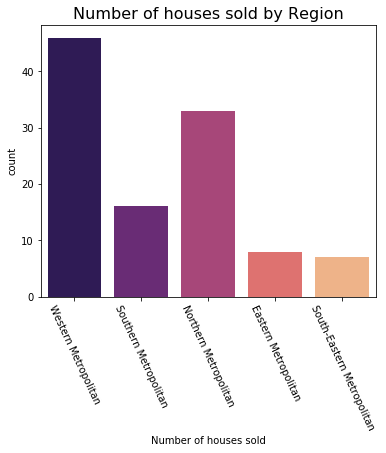

In [33]:
#let's see the price by region
plt.figure(num=None, figsize=(6,5))
cp=sns.countplot(x="Regionname",data=data, palette='magma',orient="h")
cp.set_xticklabels(cp.get_xticklabels(),rotation=-65)
plt.xlabel("Number of houses sold")
plt.title("Number of houses sold by Region",fontdict={"fontsize":16})
plt.show()

Most of the houses sold are located in Western Metropolitan Region.

As we have too many years, it would be more convenient and representative for visualization to transform years into centuries.
We will do it using the following function and apply() method

In [34]:
def century(row):
    if row>2000:
        val = "20th"
    else:
        val="19th"
    return val

In [35]:
data.YearBuilt.apply(century).value_counts()

19th    78
20th    32
Name: YearBuilt, dtype: int64

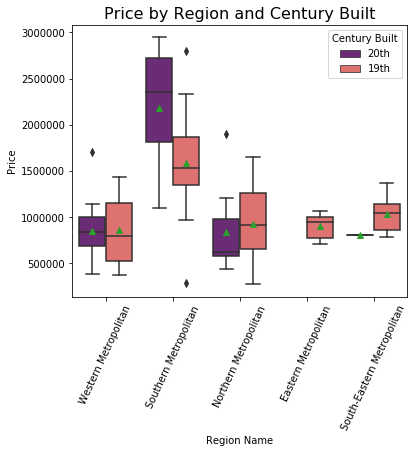

In [36]:
plt.figure(num=None, figsize=(6,5))
bx=sns.boxplot(x="Regionname",y="Price", data=data, palette='magma',hue=data.YearBuilt.apply(century),  showmeans=True)
bx.set_xticklabels(bx.get_xticklabels(),rotation=65)
plt.legend(title='Century Built', loc='upper right')
plt.xlabel("Region Name")
plt.title("Price by Region and Century Built",fontdict={"fontsize":16})
plt.show()

We can see that the highest mean price is at Souther Metropolitan region for houses built at 20th century.

In [37]:
#yearly_df=data.groupby(by='Review_year').count()

To have the final data without the transformed variables, we will drop them.

In [38]:
data.drop(["Date","YearBuilt","Month", "Season","YearSold","year_diff" ],axis=1,inplace=True)

<h1> 3. Model selection </h1> <a name="select"> </a>

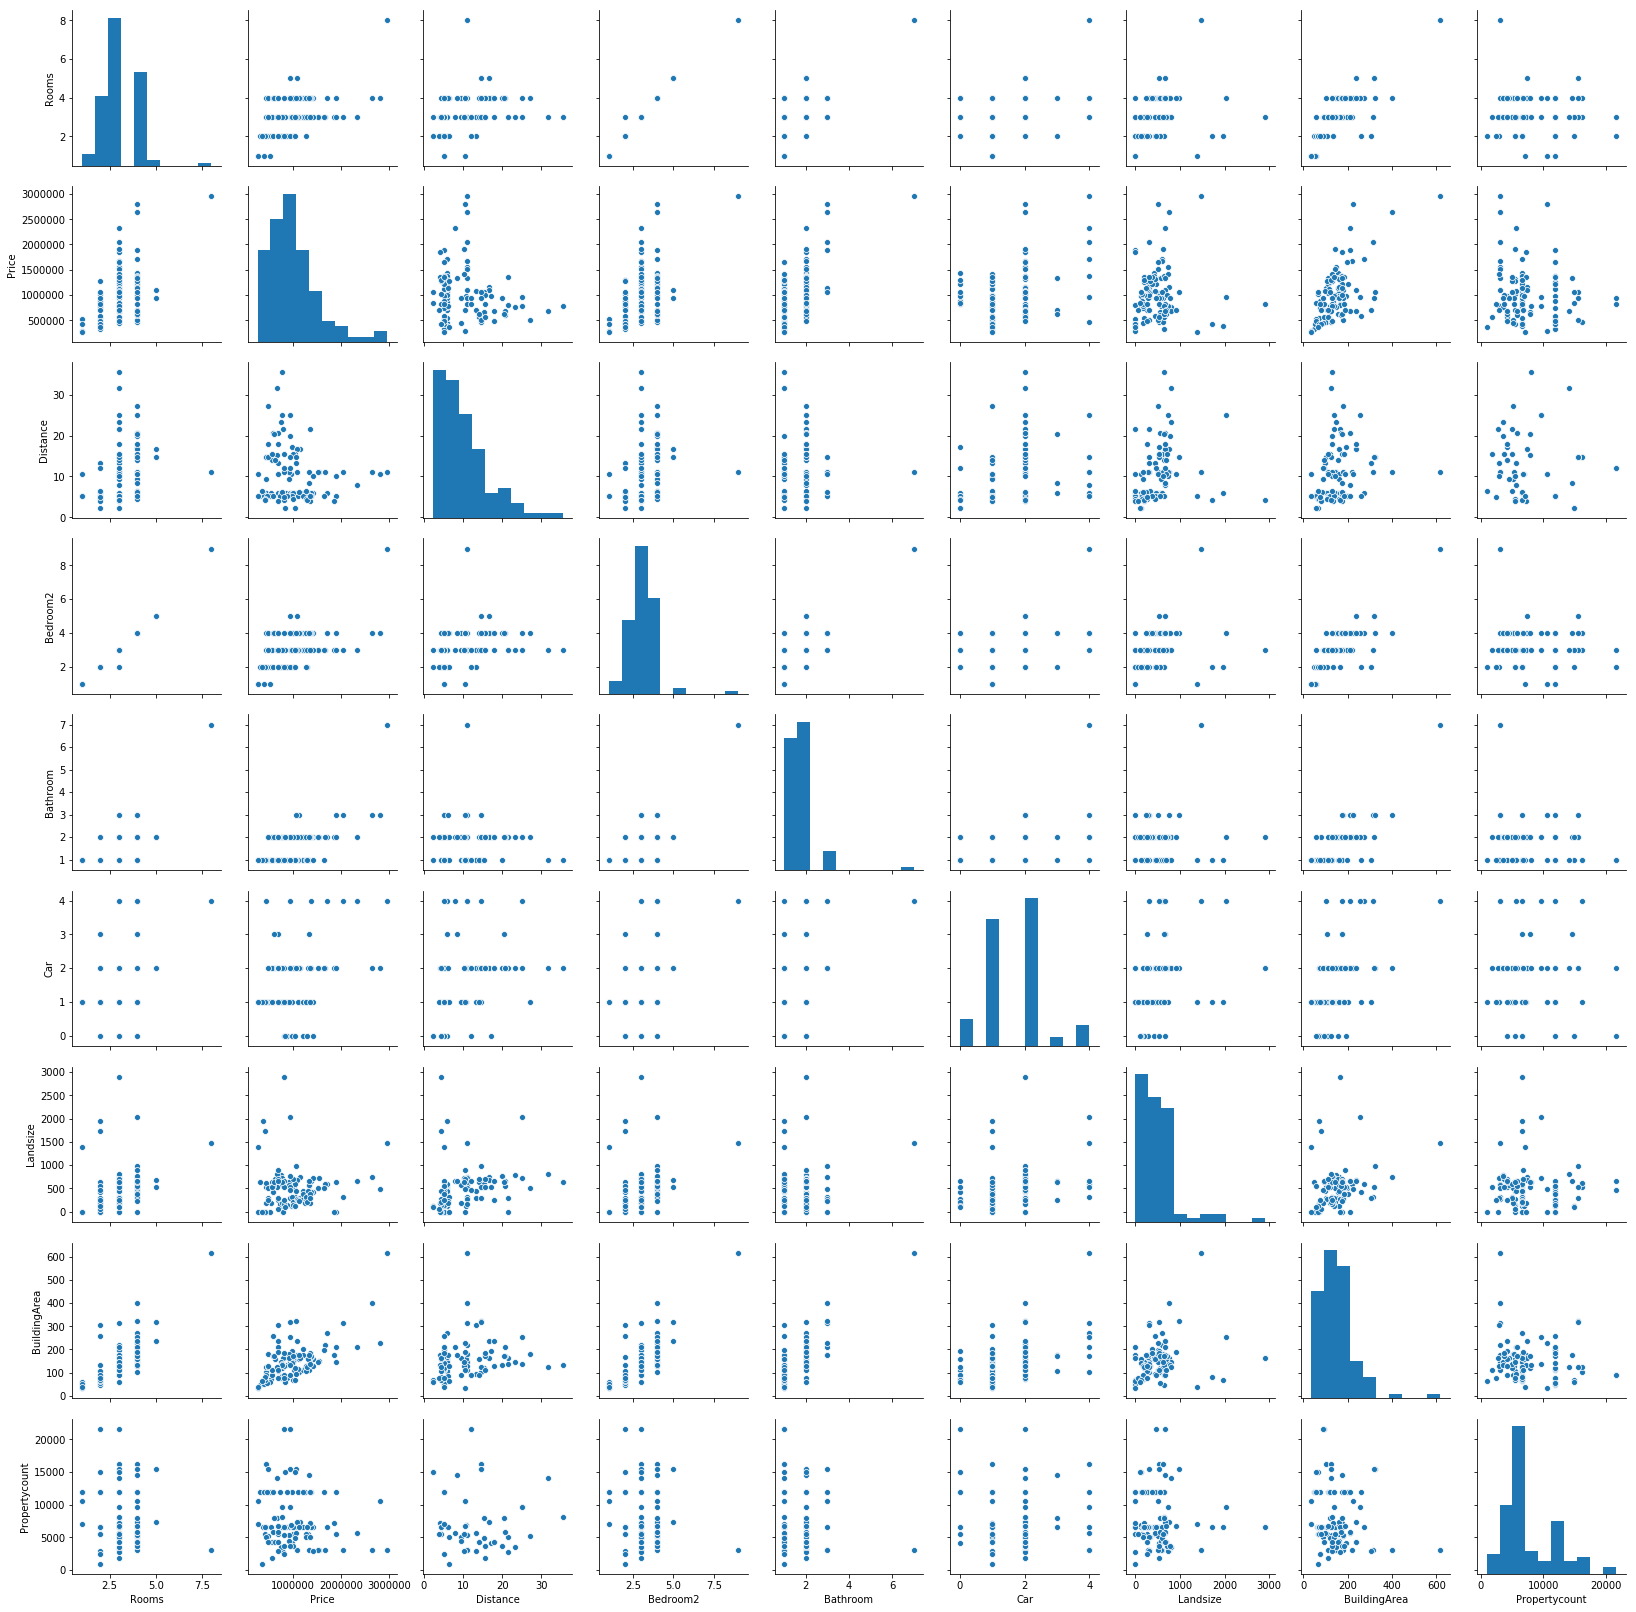

In [39]:
#To see the visual representation of pairwise relationships in a dataset, a pairplot is used. Note that it only plots numeric
#columns.
sns.pairplot(data)

To see the patterns interesting us in details, we can plot the pairs using appropriate types of plots.
Let's plot several of them.

 <h3><u>Checking for correlations (multicollinearity)</u></h3>

In [40]:
#lets see the corrplot
data.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
Rooms,1.000000,0.496441,0.322496,0.992288,0.693759,0.427596,0.289627,0.743288,-0.094804
Price,0.496441,1.000000,-0.141503,0.498843,0.570595,0.329081,0.041088,0.628836,-0.134389
Distance,0.322496,-0.141503,1.000000,0.312113,0.133916,0.334017,0.244377,0.220520,-0.085765
Bedroom2,0.992288,0.498843,0.312113,1.000000,0.724278,0.433750,0.298613,0.753977,-0.097368
Bathroom,0.693759,0.570595,0.133916,0.724278,1.000000,0.427814,0.187223,0.765947,-0.175644
Car,0.427596,0.329081,0.334017,0.433750,0.427814,1.000000,0.311213,0.487816,-0.102099
Landsize,0.289627,0.041088,0.244377,0.298613,0.187223,0.311213,1.000000,0.284929,-0.044187
BuildingArea,0.743288,0.628836,0.220520,0.753977,0.765947,0.487816,0.284929,1.000000,-0.150502
Propertycount,-0.094804,-0.134389,-0.085765,-0.097368,-0.175644,-0.102099,-0.044187,-0.150502,1.000000


There are a lot of pairs having high correlation, but the representation is not convenient to see the overall picture, thus we will use some visualizations.

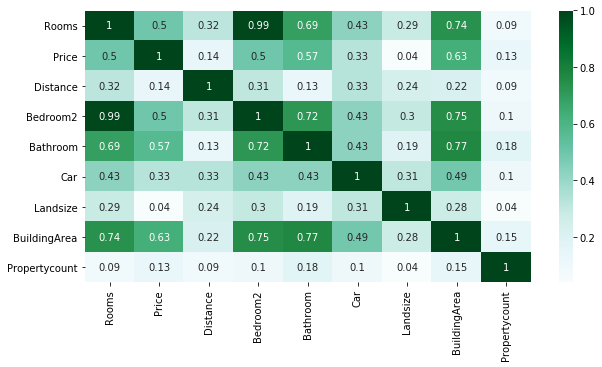

In [41]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")

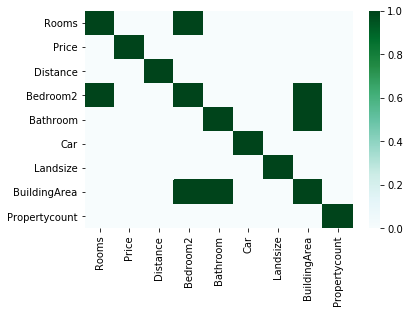

In [42]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that number of variables are highly correlated, which will affect the results.
#Thus we will include only several of them in the analysis
sns.heatmap(data.corr().abs()>=0.75, cmap = "BuGn")

In [43]:
#let's drop Bedroom and bathroom variables, as they have high correlation coefficient and 
#the information is repeated in number of rooms.
data.drop("Bedroom2",axis=1,inplace=True)

In [44]:
data.drop("Bathroom", axis=1, inplace=True)

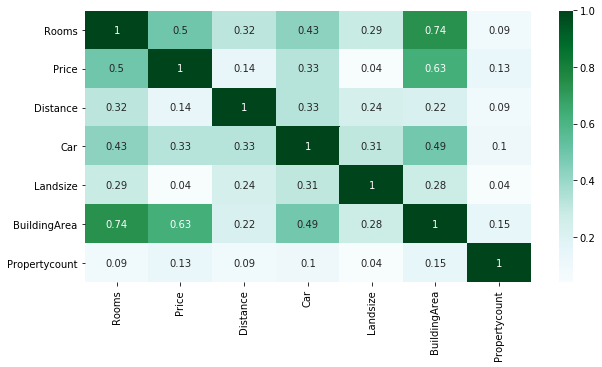

In [45]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")

After dropping the noted variables we see that there is no correlation coefficient higher than 0.75 so won't exclude any other variable.

In [46]:
#let's convert categorical variables in the dataset into dummy variables
data=pd.get_dummies(data,drop_first=True)
data.head()

,Rooms,Price,Distance,Car,Landsize,BuildingArea,Propertycount,Type_t,Type_u,Method_S,Method_SP,Method_VB,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
0,2,865000,5.9,1,146,132.0,6567,1,0,0,1,0,0,0,0,1
1,2,442000,5.9,1,0,62.0,6567,0,1,1,0,0,0,0,0,1
2,3,1037500,5.9,2,506,110.0,6567,0,0,1,0,0,0,0,0,1
3,3,1050000,5.9,2,318,160.0,6567,1,0,1,0,0,0,0,0,1
4,2,440000,5.9,1,0,65.0,6567,0,1,1,0,0,0,0,0,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
Rooms                                    110 non-null int64
Price                                    110 non-null int64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null int64
BuildingArea                             110 non-null float64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern Metropolitan         110 non-null uint8
Regionname_South-Eastern Metropolitan    110 non-null uint8
Regionname_Southern Metropolitan         110 non-nu

In [48]:
#as the names of newly creayed dummy variables contain space and "-", let's replace with underscore ("_")
data.columns=data.columns.str.replace(" ","_")
data.columns=data.columns.str.replace("-","_")

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
Rooms                                    110 non-null int64
Price                                    110 non-null int64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null int64
BuildingArea                             110 non-null float64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern_Metropolitan         110 non-null uint8
Regionname_South_Eastern_Metropolitan    110 non-null uint8
Regionname_Southern_Metropolitan         110 non-nu

<h1> 3.1 Running and building the OLS model (statsmodels) (backward selection, model transformation) </h1> <a name="stats"> </a>

In [50]:
#setting the varables
Y_linear=data["Price"]
X_linear=data.drop("Price", axis=1)

In [51]:
# Adding a constant term to the predictor, the intercept is not included in the model and should be added by the user
X_linear=sm.add_constant(X_linear)

In [52]:
model_linear= sm.OLS(Y_linear,X_linear)

<b>Next, build the model.</b>

In [53]:
results=model_linear.fit()

<b>Last, see the summary.</b>

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     28.32
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           2.46e-28
Time:                        04:17:52   Log-Likelihood:                -1506.2
No. Observations:                 110   AIC:                             3044.
Df Residuals:                      94   BIC:                             3088.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  9.692e+05   1.67e+05      5.794      0.000    6.37e+05     1.3e+06
Rooms                                  1.682e+04   4.28e+04      0.393      0.695   -6.82e+04    1.02e+05
Distance                              -4.199e+04   5151.927     -8.151      0.000   -5.22e+04   -3.18e+04
Car                                     5.93e+04   3.01e+04      1.970      0.052    -476.383    1.19e+05
Landsize                                 -0.3259     60.641     -0.005      0.996    -120.730     120.078
BuildingArea                           2415.0326    478.759      5.044      0.000    1464.446    3365.620
Propertycount                             4.4921      6.434      0.698      0.487      -8.282      17.266
Type_t                                -2.147e+05   8.84e+04     -2.429      0.017    -3.9e+05   -3.92e+04
Type_u                                -4.995e+05   7.74e+04     -6.458      0.000   -6.53e+05   -3.46e+05
Method_S                               1.918e+05   7.24e+04      2.648      0.009     4.8e+04    3.36e+05
Method_SP                              2.718e+05   9.77e+04      2.783      0.007    7.79e+04    4.66e+05
Method_VB                              4.039e+05    1.2e+05      3.369      0.001    1.66e+05    6.42e+05
Regionname_Northern_Metropolitan      -2.959e+05   1.15e+05     -2.565      0.012   -5.25e+05   -6.69e+04
Regionname_South_Eastern_Metropolitan  1.578e+05   1.26e+05      1.251      0.214   -9.26e+04    4.08e+05
Regionname_Southern_Metropolitan       4.168e+05   1.12e+05      3.726      0.000    1.95e+05    6.39e+05
Regionname_Western_Metropolitan       -3.229e+05   1.05e+05     -3.080      0.003   -5.31e+05   -1.15e+05
==============================================================================
Omnibus:                        1.051   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.610
Skew:                           0.132   Prob(JB):                        0.737
Kurtosis:                       3.251   Cond. No.                     9.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#Let's see the significant and not significant variables
results.pvalues[results.pvalues<0.05]

const                               9.102175e-08
Distance                            1.539914e-12
BuildingArea                        2.211279e-06
Type_t                              1.704125e-02
Type_u                              4.634903e-09
Method_S                            9.491589e-03
Method_SP                           6.516747e-03
Method_VB                           1.095805e-03
Regionname_Northern_Metropolitan    1.189906e-02
Regionname_Southern_Metropolitan    3.323841e-04
Regionname_Western_Metropolitan     2.717301e-03
dtype: float64

In [56]:
#not significant ones
results.pvalues[results.pvalues>0.05]

Rooms                                    0.695359
Car                                      0.051816
Landsize                                 0.995723
Propertycount                            0.486771
Regionname_South_Eastern_Metropolitan    0.213989
dtype: float64

In [57]:
#Let's remove Landsize and see the results again

In [58]:
Y_linear_1=data["Price"]
X_linear_1=data.drop(["Price","Landsize"], axis=1)
X_linear_1=sm.add_constant(X_linear_1)

In [59]:
results_1= sm.OLS(Y_linear_1,X_linear_1).fit()

In [60]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     30.67
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           4.35e-29
Time:                        04:17:59   Log-Likelihood:                -1506.2
No. Observations:                 110   AIC:                             3042.
Df Residuals:                      95   BIC:                             3083.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  9.692e+05   1.66e+05      5.826      0.000    6.39e+05     1.3e+06
Rooms                                   1.68e+04   4.23e+04      0.397      0.692   -6.71e+04    1.01e+05
Distance                                -4.2e+04   5021.480     -8.364      0.000    -5.2e+04    -3.2e+04
Car                                    5.928e+04   2.96e+04      2.002      0.048     492.837    1.18e+05
BuildingArea                           2414.8088    474.429      5.090      0.000    1472.949    3356.669
Propertycount                             4.4922      6.400      0.702      0.484      -8.213      17.197
Type_t                                -2.146e+05   8.69e+04     -2.469      0.015   -3.87e+05   -4.21e+04
Type_u                                -4.996e+05   7.49e+04     -6.673      0.000   -6.48e+05   -3.51e+05
Method_S                               1.918e+05   7.11e+04      2.697      0.008    5.06e+04    3.33e+05
Method_SP                              2.719e+05   9.48e+04      2.869      0.005    8.37e+04     4.6e+05
Method_VB                              4.039e+05   1.19e+05      3.390      0.001    1.67e+05     6.4e+05
Regionname_Northern_Metropolitan      -2.959e+05   1.15e+05     -2.582      0.011   -5.23e+05   -6.84e+04
Regionname_South_Eastern_Metropolitan  1.578e+05   1.24e+05      1.271      0.207   -8.86e+04    4.04e+05
Regionname_Southern_Metropolitan       4.168e+05   1.11e+05      3.767      0.000    1.97e+05    6.37e+05
Regionname_Western_Metropolitan       -3.229e+05   1.04e+05     -3.096      0.003    -5.3e+05   -1.16e+05
==============================================================================
Omnibus:                        1.051   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.610
Skew:                           0.132   Prob(JB):                        0.737
Kurtosis:                       3.251   Cond. No.                     9.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
results_1.pvalues[results_1.pvalues>0.05]

Rooms                                    0.691997
Propertycount                            0.484440
Regionname_South_Eastern_Metropolitan    0.206692
dtype: float64

In [62]:
#We continue removing the not significant variables based on their p-value size.
#This process can be continued till some desired output of R-squared and R-squared adjusted is reached.
#Let's remove Rooms and see the results again

In [63]:
Y_linear_2=data["Price"]
X_linear_2=data.drop(["Price","Landsize", "Rooms"], axis=1)
X_linear_2=sm.add_constant(X_linear_2)

In [64]:
results_2= sm.OLS(Y_linear_2,X_linear_2).fit()

In [65]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     33.31
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           7.94e-30
Time:                        04:18:07   Log-Likelihood:                -1506.3
No. Observations:                 110   AIC:                             3041.
Df Residuals:                      96   BIC:                             3078.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  9.985e+05   1.48e+05      6.726      0.000    7.04e+05    1.29e+06
Distance                              -4.182e+04   4980.520     -8.398      0.000   -5.17e+04   -3.19e+04
Car                                    6.034e+04   2.94e+04      2.055      0.043    2060.384    1.19e+05
BuildingArea                           2545.4806    340.458      7.477      0.000    1869.677    3221.285
Propertycount                             4.3718      6.364      0.687      0.494      -8.262      17.005
Type_t                                -2.241e+05   8.32e+04     -2.692      0.008   -3.89e+05   -5.89e+04
Type_u                                -5.132e+05   6.63e+04     -7.739      0.000   -6.45e+05   -3.82e+05
Method_S                               1.916e+05   7.08e+04      2.705      0.008     5.1e+04    3.32e+05
Method_SP                              2.712e+05   9.43e+04      2.874      0.005    8.39e+04    4.58e+05
Method_VB                               4.09e+05   1.18e+05      3.468      0.001    1.75e+05    6.43e+05
Regionname_Northern_Metropolitan      -2.923e+05   1.14e+05     -2.570      0.012   -5.18e+05   -6.65e+04
Regionname_South_Eastern_Metropolitan  1.653e+05   1.22e+05      1.353      0.179   -7.73e+04    4.08e+05
Regionname_Southern_Metropolitan       4.161e+05    1.1e+05      3.777      0.000    1.97e+05    6.35e+05
Regionname_Western_Metropolitan       -3.178e+05   1.03e+05     -3.084      0.003   -5.22e+05   -1.13e+05
==============================================================================
Omnibus:                        0.856   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.471
Skew:                           0.127   Prob(JB):                        0.790
Kurtosis:                       3.196   Cond. No.                     8.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#Model transformation
#Let's also try to transform our model using log-linear one (as price is right skewed) and add an interaction term. 
#E.g. we have Rooms and Building area correlation coefficient as 0.74, so instead of including both of them, will include the interaction term
#Also, let's take a square of Distance, as its relationship with price is kind of parabola-shaped.


In [67]:
#let's save the data for transformed model in a new dataframe and only then modify it for a model
data_tr=data

In [68]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
Rooms                                    110 non-null int64
Price                                    110 non-null int64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null int64
BuildingArea                             110 non-null float64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern_Metropolitan         110 non-null uint8
Regionname_South_Eastern_Metropolitan    110 non-null uint8
Regionname_Southern_Metropolitan         110 non-nu

In [69]:
data_tr["Price"]=np.log(data["Price"])


In [70]:
data_tr["Distance"]=np.sqrt(data["Distance"])

In [71]:
data_tr["Rooms_Build"]=data_tr["Rooms"]*data_tr["BuildingArea"]

In [72]:
data_tr.drop(["Rooms", "BuildingArea"],axis=1,inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
Price                                    110 non-null float64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null int64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern_Metropolitan         110 non-null uint8
Regionname_South_Eastern_Metropolitan    110 non-null uint8
Regionname_Southern_Metropolitan         110 non-null uint8
Regionname_Western_Metropolitan          110 non-null uint8
Rooms_Build                              110 non-nu

In [74]:
Y_linear_tr=data_tr["Price"]
X_linear_tr=data_tr.drop("Price", axis=1)
X_linear_tr=sm.add_constant(X_linear_tr)

In [75]:
results_tr=sm.OLS(Y_linear_tr, X_linear_tr).fit()

In [76]:
results_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     24.07
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           3.27e-25
Time:                        04:18:18   Log-Likelihood:                 7.7635
No. Observations:                 110   AIC:                             14.47
Df Residuals:                      95   BIC:                             54.98
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    14.8723      0.186     79.835      0.000      14.502      15.242
Distance                                 -0.3497      0.038     -9.241      0.000      -0.425      -0.275
Car                                       0.0692      0.031      2.213      0.029       0.007       0.131
Landsize                                1.29e-05   6.34e-05      0.203      0.839      -0.000       0.000
Propertycount                           6.18e-06   6.73e-06      0.918      0.361   -7.19e-06    1.95e-05
Type_t                                   -0.1673      0.090     -1.858      0.066      -0.346       0.011
Type_u                                   -0.7790      0.071    -10.927      0.000      -0.921      -0.637
Method_S                                  0.1540      0.076      2.018      0.046       0.002       0.305
Method_SP                                 0.2577      0.102      2.537      0.013       0.056       0.459
Method_VB                                 0.1424      0.125      1.138      0.258      -0.106       0.391
Regionname_Northern_Metropolitan         -0.5360      0.120     -4.456      0.000      -0.775      -0.297
Regionname_South_Eastern_Metropolitan     0.0698      0.131      0.535      0.594      -0.189       0.329
Regionname_Southern_Metropolitan          0.1399      0.117      1.196      0.235      -0.092       0.372
Regionname_Western_Metropolitan          -0.5338      0.108     -4.925      0.000      -0.749      -0.319
Rooms_Build                               0.0002   5.48e-05      3.939      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.590   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                2.996
Skew:                          -0.378   Prob(JB):                        0.224
Kurtosis:                       3.287   Cond. No.                     9.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#further steps can be based also on backward stepwise elimination or using AIC/BIC forward/backward selection methods.

<h1> 3.2 Running and building the OLS model (sklearn) </h1> <a name="sklearn"> </a>

In [78]:
#let's first perform the model on the second model we had.
X_train, X_test, y_train, y_test = train_test_split(X_linear_2, Y_linear_2, test_size=0.25, random_state=42)

In [79]:
lm=LinearRegression()

In [80]:
#building the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
test_predictions = lm.predict(X_test)

In [82]:
lm.score(X_test,y_test)

0.4964815778139767

In [83]:
#Same steps for the last model
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X_linear_tr, Y_linear_tr, test_size=0.25, random_state=42)

In [84]:
lm=LinearRegression()
lm.fit(X_train_tr,y_train_tr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
lm.score(X_test_tr,y_test_tr)

0.5100203063117763

So from external validity point, the transformed model is performs better.

<h1>4.Checking LR assumptions using residual analysis (visual evidence)</h1><a name="resid"></a>

To check the assumptions using residual analysis we will plot the fitted values vs error terms (residuals). It should not exhibit any patterns (should be randomly distributed) to meet the Linearity, Normality and Independence assumptions.

In [86]:
#residuals of the model
residuals=results_tr.resid
predicted_values=results_tr.predict()

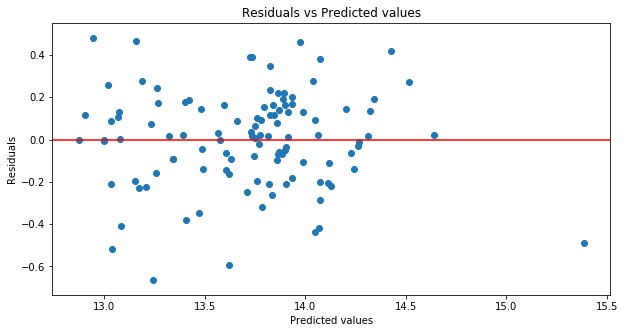

In [87]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

The residuals vs fitted values plot pattern is random and we cannot see an increasing/decreasing variance.

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


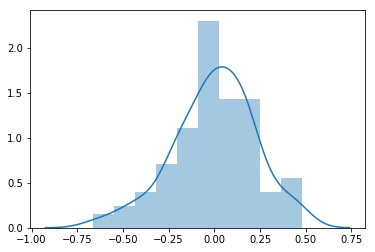

In [88]:
#Normality
#visual presentation- histogram
sns.distplot(residuals)
plt.show()

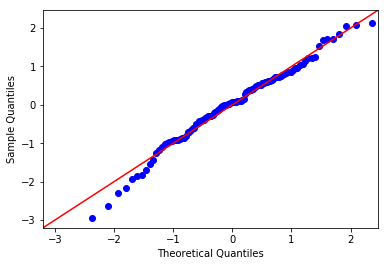

In [89]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

The residuals distribution plot shows that the distribution is approximately bell-shaped, so based on the plot only we can say that the normality assumption is held.
QQ-plot shows that the there are several outliers, but overall the dots are along the line.

<h2>Diagnostic tests for LINE assumptions </h2>

In [90]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.119382383655144), ('p-value', 0.3591467644430484)]


Linearity assumption is held, since we have a large p-value.

In [91]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))


[('Lagrange multiplier statistic', 35.46722364469309), ('p-value', 0.0021087819476184764), ('f-value', 2.9820607663112293), ('f p-value', 0.0006406050871345858)]


In [92]:
#We reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is violated.

In [93]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9837731122970581), ('p-value', 0.20321108400821686)]


Test confirms that the data was drawn from a normal distribution.

In [94]:
#defining colnames 
var=data_tr.columns.tolist()

In [95]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif = [variance_inflation_factor(data_tr[var].values, i) for i in range(0,len(var))]
print(vif)

[54.38459039581716, 23.30084214981436, 6.268255655594942, 3.202196729329978, 6.381013805554353, 1.2313838061502747, 1.580583166380052, 7.5212062039058285, 2.6337050197755243, 1.6050638716608991, 7.470157776757384, 2.0327169982217606, 3.763957416680347, 8.31624528714282, 3.0318777379317092]


In [96]:
#printing vif values together with variable names
for i in range(0,len(var)):
    print(var[i],":",vif[i])

Price : 54.38459039581716
Distance : 23.30084214981436
Car : 6.268255655594942
Landsize : 3.202196729329978
Propertycount : 6.381013805554353
Type_t : 1.2313838061502747
Type_u : 1.580583166380052
Method_S : 7.5212062039058285
Method_SP : 2.6337050197755243
Method_VB : 1.6050638716608991
Regionname_Northern_Metropolitan : 7.470157776757384
Regionname_South_Eastern_Metropolitan : 2.0327169982217606
Regionname_Southern_Metropolitan : 3.763957416680347
Regionname_Western_Metropolitan : 8.31624528714282
Rooms_Build : 3.0318777379317092


As we see for some variables we have vary big VIF values, so the there are highly correlated variables in the model. We should drop the correlated variables one by one.

<b>!Note: To choose the best model, we also should compare the model diagnostics for the models we outlined and select the one 
    having better test results and/or passing diagnostic tests</b>. In case of failing LINE assumptions, the analysis/transformation
    should be continued to have BLUE.